In [23]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
X = pd.read_csv('encoded_scaled_features.csv')
y = pd.read_csv('classes.csv', names=['Class'])
#forgot and wrote row names (indices), so need to delete first col
X.drop('Unnamed: 0', axis = 1, inplace = True)

In [3]:
# Make train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.33)
del X
del y

In [4]:
forest = RandomForestClassifier(n_estimators=100, n_jobs = 6)
forest.fit(Xtrain, ytrain.values.ravel())
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [5]:
import sys
sys.getsizeof(forest)

56

Feature ranking:
1. feature 1 (0.281669)
2. feature 3 (0.136070)
3. feature 2 (0.125451)
4. feature 6 (0.125167)
5. feature 5 (0.124825)
6. feature 4 (0.102179)
7. feature 20 (0.007745)
8. feature 0 (0.006049)
9. feature 21 (0.005136)
10. feature 9 (0.005084)
11. feature 7 (0.004836)
12. feature 40 (0.004666)
13. feature 14 (0.004617)
14. feature 11 (0.004403)
15. feature 12 (0.004324)
16. feature 22 (0.004121)
17. feature 27 (0.003926)
18. feature 31 (0.003895)
19. feature 35 (0.003619)
20. feature 13 (0.003513)
21. feature 8 (0.003507)
22. feature 36 (0.003144)
23. feature 25 (0.003050)
24. feature 10 (0.003028)
25. feature 26 (0.002362)
26. feature 34 (0.002360)
27. feature 28 (0.002333)
28. feature 37 (0.002263)
29. feature 17 (0.002152)
30. feature 18 (0.002110)
31. feature 43 (0.001754)
32. feature 24 (0.001663)
33. feature 15 (0.001638)
34. feature 39 (0.001113)
35. feature 32 (0.001031)
36. feature 30 (0.000912)
37. feature 23 (0.000890)
38. feature 38 (0.000842)
39. feature 29

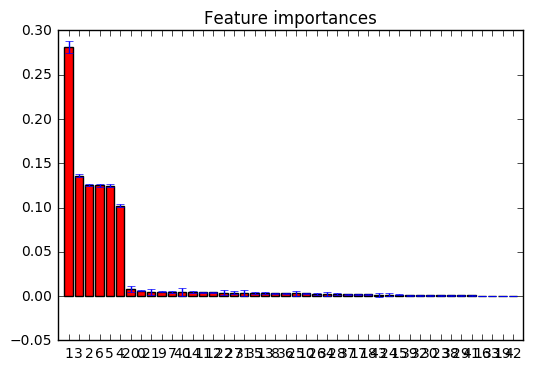

In [6]:
# Print the feature ranking
print("Feature ranking:")

for f in range(Xtrain.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(Xtrain.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(Xtrain.shape[1]), indices)
plt.xlim([-1, Xtrain.shape[1]])
plt.show()

In [8]:
drop_cols = list(Xtest.columns[indices[6:]])
Xtrain.drop(drop_cols, axis = 1, inplace = True)
Xtest.drop(drop_cols, axis = 1, inplace = True)

In [9]:
forest.fit(Xtrain, ytrain.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=6, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [22]:
from time import time
start_time = time()
score = forest.score(Xtest.iloc[:,:], ytest)
elapsed_time = time() - start_time
print("Runtime: {}\nScore: {}".format(elapsed_time, score))

Runtime: 290.0212540626526
Score: 0.7034697379617889
